## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.5):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 128
MOMENTUM = 0.95
Dropout_EXP = [0.1, 0.2, 0.3, 0.4, 0.5]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for dropout_ratio in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout = %.2f" % (dropout_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dropout_ratio)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp-dropout-%s" % str(dropout_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




Experiment with Dropout = 0.10


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)

50000/50000 [==============================] - 3s 63us/step - loss: 1.3671 - acc: 0.5062 - val_loss: 1.3961 - val_acc: 0.5002
Epoch 26/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.3505 - acc: 0.5124 - val_loss: 1.4118 - val_acc: 0.4957
Epoch 27/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.3435 - acc: 0.5158 - val_loss: 1.4072 - val_acc: 0.5030
Epoch 28/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.3437 - acc: 0.5154 - val_loss: 1.3717 - val_acc: 0.5132
Epoch 29/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.3356 - acc: 0.5187 - val_loss: 1.3853 - val_acc: 0.5115
Epoch 30/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.3319 - acc: 0.5204 - val_loss: 1.3799 - val_acc: 0.5105
Epoch 31/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.3162 - acc: 0.5258 - val_loss: 1.4254 - val_acc: 0.4956
Epoch 32/50
50000/50000 [=====================

Epoch 24/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.5110 - acc: 0.4561 - val_loss: 1.4623 - val_acc: 0.4826
Epoch 25/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5047 - acc: 0.4598 - val_loss: 1.4554 - val_acc: 0.4818
Epoch 26/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.5071 - acc: 0.4576 - val_loss: 1.4919 - val_acc: 0.4685
Epoch 27/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.5111 - acc: 0.4587 - val_loss: 1.4834 - val_acc: 0.4801
Epoch 28/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4929 - acc: 0.4636 - val_loss: 1.4890 - val_acc: 0.4691
Epoch 29/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.4896 - acc: 0.4651 - val_loss: 1.4701 - val_acc: 0.4770
Epoch 30/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4844 - acc: 0.4663 - val_loss: 1.4654 - val_acc: 0.4743
Epoch 31/50
50000/50000 [=========

50000/50000 [==============================] - 3s 63us/step - loss: 1.7198 - acc: 0.3781 - val_loss: 1.6720 - val_acc: 0.4129
Epoch 23/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.7193 - acc: 0.3760 - val_loss: 1.6669 - val_acc: 0.4163
Epoch 24/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.7164 - acc: 0.3773 - val_loss: 1.6477 - val_acc: 0.4176
Epoch 25/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.7116 - acc: 0.3773 - val_loss: 1.6500 - val_acc: 0.4235
Epoch 26/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.7032 - acc: 0.3863 - val_loss: 1.6614 - val_acc: 0.4208
Epoch 27/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.7115 - acc: 0.3784 - val_loss: 1.6182 - val_acc: 0.4284
Epoch 28/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.7060 - acc: 0.3824 - val_loss: 1.6194 - val_acc: 0.4317
Epoch 29/50
50000/50000 [=====================

Epoch 21/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.8545 - acc: 0.3129 - val_loss: 1.8180 - val_acc: 0.3685
Epoch 22/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.8510 - acc: 0.3187 - val_loss: 1.8383 - val_acc: 0.3621
Epoch 23/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.8437 - acc: 0.3170 - val_loss: 1.7993 - val_acc: 0.3519
Epoch 24/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.8432 - acc: 0.3168 - val_loss: 1.8204 - val_acc: 0.3745
Epoch 25/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.8398 - acc: 0.3216 - val_loss: 1.8227 - val_acc: 0.3547
Epoch 26/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.8403 - acc: 0.3199 - val_loss: 1.8296 - val_acc: 0.3462
Epoch 27/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.8408 - acc: 0.3203 - val_loss: 1.8295 - val_acc: 0.3477
Epoch 28/50
50000/50000 [=========

50000/50000 [==============================] - 3s 63us/step - loss: 1.9834 - acc: 0.2433 - val_loss: 2.0159 - val_acc: 0.2546
Epoch 20/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.9741 - acc: 0.2455 - val_loss: 2.0141 - val_acc: 0.2633
Epoch 21/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.9720 - acc: 0.2515 - val_loss: 1.9673 - val_acc: 0.2779
Epoch 22/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.9713 - acc: 0.2503 - val_loss: 1.9692 - val_acc: 0.2887
Epoch 23/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.9704 - acc: 0.2480 - val_loss: 1.9725 - val_acc: 0.2681
Epoch 24/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.9667 - acc: 0.2537 - val_loss: 1.9973 - val_acc: 0.2721
Epoch 25/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.9641 - acc: 0.2526 - val_loss: 1.9638 - val_acc: 0.2851
Epoch 26/50
50000/50000 [=====================

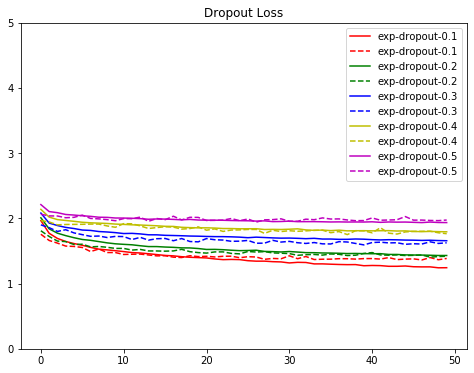

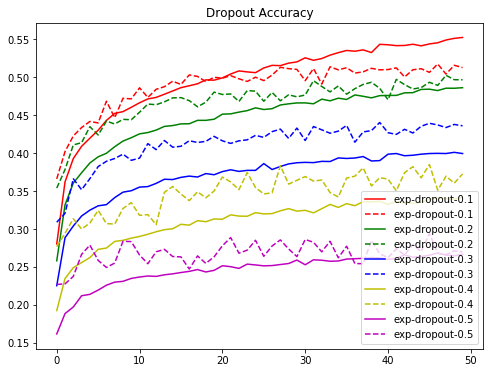

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Dropout Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Dropout Accuracy")
plt.legend()
plt.show()

In [ ]:
## 結論:  dropout ratio 設成最低的好像準確度最高